In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Часть 1

**1 номер**

Он оценил вероятность p(t) - это вероятность того, что произвольный человек имеет этот редкий вид крови, но по такой логике можно сказать, что преступник любой человек с данной группой крови(а таких 1% от города). Должен был оценить: 
p(d|t) = p(t|d) * p(d) / p(t) (здесь p(d) - вероятность, что человек виновен, p(t) - вероятность редкого вида крови)

**2 номер**

В задаче p(t) - это вероятность того, что из 10000 людей (с данной группой крови) конкретный человек преступник, но не учитывается тот факт, что человека на скамью подсудимых взяли не рандомно, а предположим за какие-то улики, обозначим p(d) - вероятность аналогичных улик у человека из этой группы 10000 людей. Получается нужно было оценить: 
p(t|d) = p(d|t) * p(t) / p(d) (вероятность, что данный человек из группы 10000 людей с редкой кровью преступник при условии улик)

**3 номер**

нужно построить графики p(d = 1| t = 1) и p(d = 1| t = 0)

In [ ]:
x = np.arange(0.001, 0.5, 0.001)
y_1 = (1-x) * 0.01 / ((1-x) * 0.01 + x * 0.99) # p(d = 1| t = 1)
y_2 = x * 0.01 / (x * 0.01 + (1 - x) * 0.99) # p(d = 1| t = 0)

Text(0, 0.5, 'p(d = 1| t = 1)')

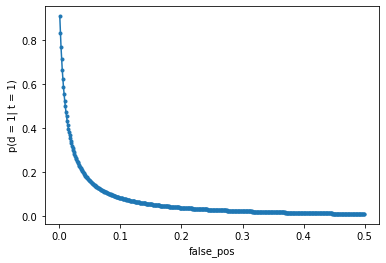

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y_1, marker='.', label='p(d = 1| t = 1)')
plt.xlabel('false_pos')
plt.ylabel('p(d = 1| t = 1)')


Text(0, 0.5, 'p(d = 1| t = 0)')

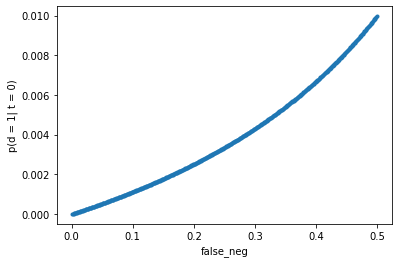

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y_2, marker='.', label='p(d = 1| t = 0)')
plt.xlabel('false_neg')
plt.ylabel('p(d = 1| t = 0)')

По графикам можно сделать вывод, что уменьшение falsepos в экспоненциальнос росте влияет на увеличнение апостериорной вероятности болезни после положительного теста, что для нас очень хорошо, в то время как уменьшение falseneg очень слабо влияет на апостериорную вероятность болезни после отрицательного теста, при уменьшении на 0.1 она уменьшается примерно на 0.002, что особой роли не играет. Поэтому однозначно нужно тратить силы на уменьшение false_positive.

# Часть 2

**1 номер**

In [25]:
data = pd.read_csv("owid-covid-data.csv")

In [26]:
def new_case_func(x):
  if x == 0:
    return 1
  else:
    return x

data = data[data["location"] == "Russia"]

data.date.apply(lambda x: pd.to_datetime(x))

data = data[data["date"] >= "2020-03-03"]
data['new_cases'] = data['new_cases'].apply(lambda x: new_case_func(x))


data.head(30)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52922,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.000,0.021,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.000,0.021,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46414.0,0.318,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.000,0.027,0.007,0.002,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952.0,51366.0,0.352,0.034,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.000,0.089,0.062,0.011,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.0,55688.0,0.382,0.030,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52926,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.000,0.089,0.000,0.011,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.0,59960.0,0.411,0.029,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52927,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.000,0.116,0.027,0.015,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3231.0,63191.0,0.433,0.022,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52928,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,0.000,0.116,0.000,0.014,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52929,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,0.000,0.137,0.021,0.017,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70601.0,0.484,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.94,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52930,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,0.000,0.137,0.000,0.017,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6362.0,76963.0,0.527,0.044,4364.0,0.030,0.001,1796.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.94,145934460.0,8.823,39.6,14.

In [28]:
data_train = data.iloc[:50]
data_test = data.iloc[50:]

**2 номер**

[Text(0, 0.5, 'total_cases'), Text(0.5, 0, 'date')]

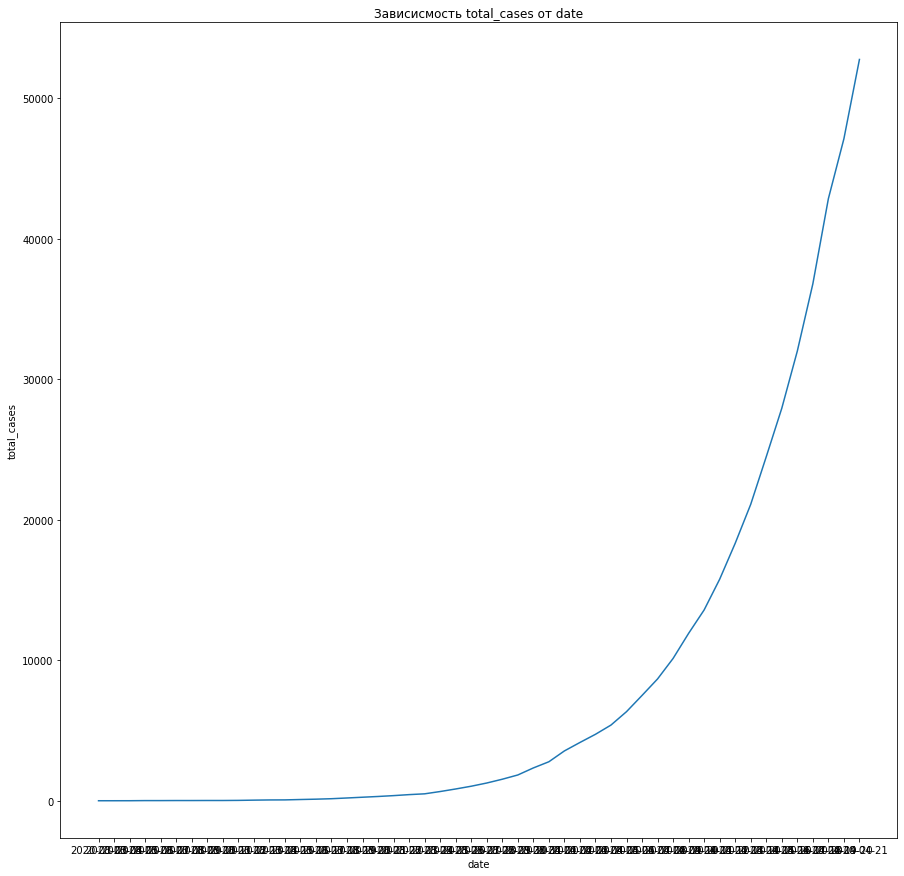

In [31]:
fig, ax = plt.subplots(figsize=(15,15))


ax.set_title("Зависисмость total_cases от date")
ax.plot(data_train["date"], data_train["total_cases"])
ax.set(xlabel="date", ylabel="total_cases")

[Text(0, 0.5, 'new_cases'), Text(0.5, 0, 'date')]

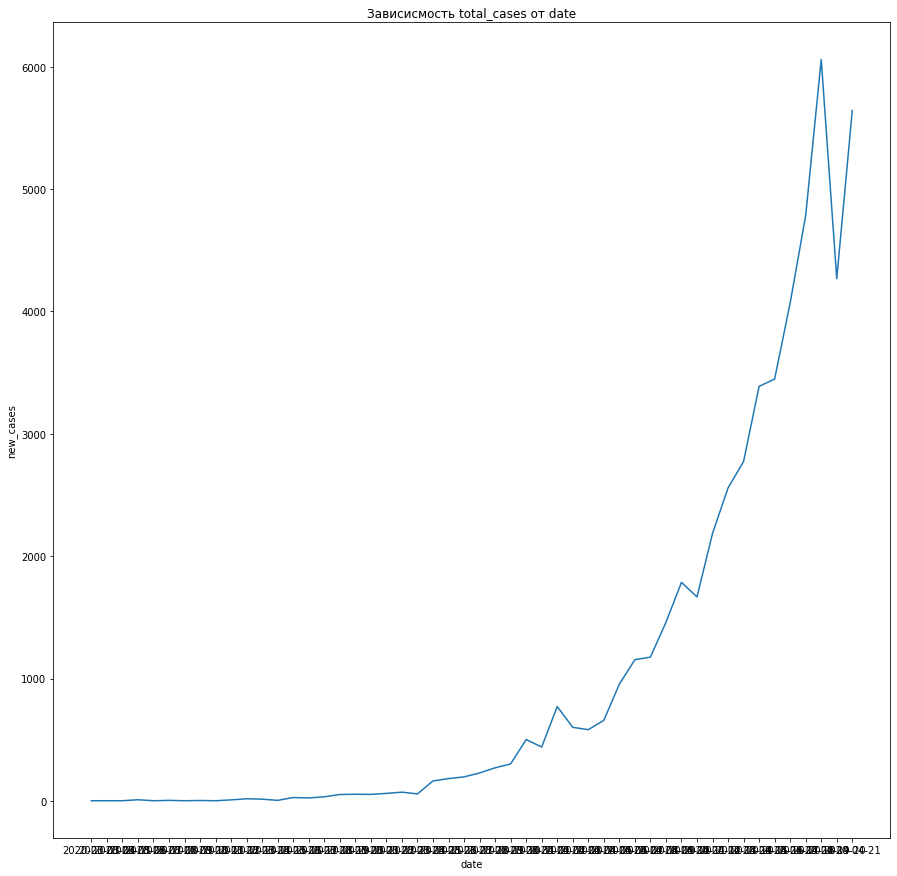

In [32]:
fig, ax = plt.subplots(figsize=(15,15))


ax.set_title("Зависисмость new_cases от date")
ax.plot(data_train["date"], data_train["new_cases"])
ax.set(xlabel="date", ylabel="new_cases")

In [36]:
x_train = np.arange(0, 50)
y_total = np.log(data_train["total_cases"].values)
y_new = np.log(data_train["new_cases"].values)

reg_total = LinearRegression()
reg_new = LinearRegression()

reg_total.fit(x_train.reshape(1, -1), y_total)
reg_new.fit(x_train.reshape(1, -1), y_new)

ValueError: ignored